In [6]:
from tensorflow.keras.models import load_model, model_from_json
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

plt.style.use('dark_background')

In [4]:
! ls modelp

model_structure.json model_weights.h5


In [7]:
json_file = open('modelp/model_structure.json','r')
model_structure = json_file.read()
json_file.close()

model = model_from_json(model_structure)

model.load_weights('modelp/model_weights.h5')

2022-06-28 23:37:21.021802: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [51]:
!ls spiral_processed/test/healthy

healthy_V01HE01_0_2830.jpg healthy_V09HE02_0_313.jpg
healthy_V01HE01_0_4663.jpg healthy_V09HE02_0_5163.jpg
healthy_V01HE01_0_4676.jpg healthy_V09HE02_0_6127.jpg
healthy_V01HE01_0_6497.jpg healthy_V09HE02_0_6735.jpg
healthy_V01HE01_0_8059.jpg healthy_V09HE02_0_8462.jpg
healthy_V01HE01_0_8305.jpg healthy_V09HE03_0_1626.jpg
healthy_V01HE01_0_9834.jpg healthy_V09HE03_0_3176.jpg
healthy_V01HE02_0_1307.jpg healthy_V09HE03_0_3807.jpg
healthy_V01HE02_0_2961.jpg healthy_V09HE03_0_5101.jpg
healthy_V01HE02_0_3912.jpg healthy_V09HE03_0_5292.jpg
healthy_V01HE02_0_4448.jpg healthy_V09HE03_0_5911.jpg
healthy_V01HE02_0_5595.jpg healthy_V09HE03_0_6231.jpg
healthy_V01HE02_0_5767.jpg healthy_V09HE03_0_6968.jpg
healthy_V01HE02_0_6859.jpg healthy_V09HE03_0_7846.jpg
healthy_V01HE02_0_744.jpg  healthy_V09HE03_0_7888.jpg
healthy_V01HE02_0_751.jpg  healthy_V09HE03_0_8357.jpg
healthy_V01HE02_0_7778.jpg healthy_V10HE01_0_2271.jpg
healthy_V01HE02_0_8268.jpg healthy_V10HE01_0_4343.jpg
healthy_V01HE02_0_8532.jpg he

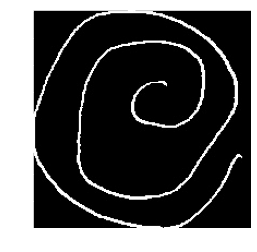

/Users/mahimairaja/DESKT/Desktop/GAIP-Learnings/GIT/Projects/Parkinson_Detection/Hand_drawings/spiral_processed/test/healthy/healthy_V01HE01_0_2830.jpg


In [84]:
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir,'spiral_processed/test/healthy/healthy_V01HE01_0_2830.jpg')

img = cv2.imread(img_path)

plt.imshow(img)
plt.show()

print(img_path)

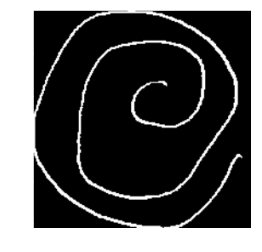

In [85]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [86]:
prediction = model.predict(np.expand_dims(resize/255, 0))

print(prediction)

[[0.39046997]]


In [87]:
if prediction < 0.5: 
    print(f'The person is Healthy')
else:
    print(f'The person may have parkinson')

The person is Healthy
